# **Tugas 1**

## **Kelompok 6**

**1. Iffatun Nisa Nasrullah				(2208107010009)**

**2. Muhammad Bintang Indra Hidayat 	(2208107010023)**

**3. Qandila Ahmara 					(2208107010039)**

**4. Alhusna Hanifah 					(2208107010060)**

**5. Farhanul Khair					(2208107010076)**

# Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display, clear_output
import threading
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Memuat Data

In [3]:
# Step 1: Baca data dari file CSV
file_path = "2024_Property_Tax_Roll.csv"
df = pd.read_csv(file_path)

# Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

df.head()

Jumlah baris: 44034
Jumlah kolom: 30


,P_ID,TAX_MAP,plat,lot,unit,CLASS,SHORT_DESC,LEVY_CODE_1,SHORT_DESC 1,CIVIC,...,STREET 1,S_SUFFIX,UNIT,CITY 1,STATE,ZIP_POSTAL 1,TOTAL_ASSMT,TOTAL_EXEMPT,TOTAL_TAXES,Property_Location
0,12.0,000-0001-0022,0.0,1.0,0022,10.0,Utility,C01,C01,NaN,...,NaN,NaN,NaN,Addison,TX,75001,6160000.0,0.0,216216.00,POINT (-71.412747 41.824461)
1,807.0,005-0514-0000,5.0,514.0,0000,1.0,Single Family,OO01,OO01,135.0,...,ABBOTT,ST,NaN,PROVIDENCE,RI,02906-1818,436900.0,47708.0,4070.76,POINT (-71.402954036 41.842866001)
2,69878.0,077-0893-0000,77.0,893.0,0000,1.0,Single Family,OO01,OO01,36.0,...,Wilna,St,NaN,Providence,RI,02904,322600.0,0.0,3374.24,POINT (-71.415484981 41.858035988)
3,2050.0,008-0350-0000,8.0,350.0,0000,1.0,Single Family,OO01,OO01,120.0,...,Morris,Ave,NaN,PROVIDENCE,RI,02906-3040,572100.0,57364.0,5383.88,POINT (-71.398264026 41.83631701)
4,5030.0,016-0560-0000,16.0,560.0,0000,1.0,Single Family,OO01,OO01,22.0,...,John,St,NaN,Providence,RI,02906,643000.0,0.0,6725.48,POINT (-71.400355981 41.821832998)


In [4]:
print(df.columns)

Index(['P_ID', 'TAX_MAP', 'plat', 'lot', 'unit', 'CLASS', 'SHORT_DESC',
       'LEVY_CODE_1', 'SHORT_DESC 1', 'CIVIC', 'STREET', 'SUFFIX',
       'FORMATED_ADDRESS', 'CITY', 'ZIP_POSTAL', 'FIRST_NAME', 'LAST_NAME',
       'COMPANY', 'FREE_LINE_2', 'CIVIC 1', 'STREET 1', 'S_SUFFIX', 'UNIT',
       'CITY 1', 'STATE', 'ZIP_POSTAL 1', 'TOTAL_ASSMT', 'TOTAL_EXEMPT',
       'TOTAL_TAXES', 'Property_Location'],
      dtype='object')


# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44034 entries, 0 to 44033
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_ID               44033 non-null  float64
 1   TAX_MAP            44033 non-null  object 
 2   plat               44033 non-null  float64
 3   lot                44033 non-null  float64
 4   unit               44033 non-null  object 
 5   CLASS              44033 non-null  float64
 6   SHORT_DESC         44033 non-null  object 
 7   LEVY_CODE_1        44033 non-null  object 
 8   SHORT_DESC 1       44033 non-null  object 
 9   CIVIC              43938 non-null  float64
 10  STREET             44031 non-null  object 
 11  SUFFIX             42442 non-null  object 
 12  FORMATED_ADDRESS   44031 non-null  object 
 13  CITY               43999 non-null  object 
 14  ZIP_POSTAL         42598 non-null  object 
 15  FIRST_NAME         34296 non-null  object 
 16  LAST_NAME          343

In [6]:
df.describe()

,P_ID,plat,lot,CLASS,CIVIC,TOTAL_ASSMT,TOTAL_EXEMPT,TOTAL_TAXES
count,44033.000000,44033.000000,44033.000000,44033.000000,43938.000000,4.403300e+04,4.403300e+04,4.403300e+04
mean,29385.422706,64.114664,329.507256,9.657234,177.369475,6.333056e+05,2.394807e+05,7.544497e+03
std,18966.827872,35.189694,235.459833,18.092440,247.141559,5.326969e+06,5.213656e+06,3.682821e+04
min,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,14381.000000,34.000000,137.000000,1.000000,36.000000,2.382000e+05,0.000000e+00,2.496680e+03
50%,27966.000000,64.000000,291.000000,2.000000,89.000000,3.118000e+05,0.000000e+00,3.890200e+03
75%,40773.000000,94.000000,478.000000,13.000000,196.000000,4.462000e+05,0.000000e+00,6.393160e+03
max,79006.000000,129.000000,1197.000000,84.000000,1955.000000,7.087266e+08,7.087266e+08,2.918528e+06


In [7]:
# Menampilkan jumlah missing values per kolom
df.isnull().sum()

P_ID                     1
TAX_MAP                  1
plat                     1
lot                      1
unit                     1
CLASS                    1
SHORT_DESC               1
LEVY_CODE_1              1
SHORT_DESC 1             1
CIVIC                   96
STREET                   3
SUFFIX                1592
FORMATED_ADDRESS         3
CITY                    35
ZIP_POSTAL            1436
FIRST_NAME            9738
LAST_NAME             9674
COMPANY              34902
FREE_LINE_2              3
CIVIC 1               1596
STREET 1              1058
S_SUFFIX              3523
UNIT                 39476
CITY 1                   7
STATE                   14
ZIP_POSTAL 1            38
TOTAL_ASSMT              1
TOTAL_EXEMPT             1
TOTAL_TAXES              1
Property_Location        0
dtype: int64

In [8]:
# Mengecek jumlah data duplikat
df.duplicated().sum()

0

Melihat Distribusi Data

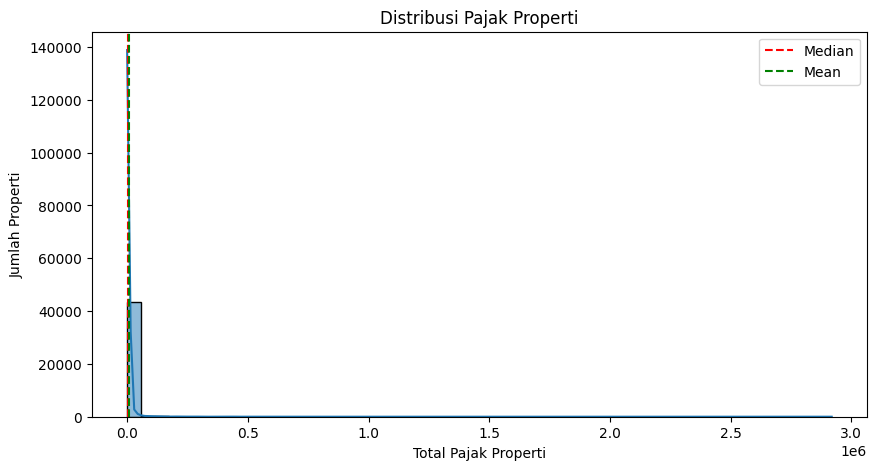

In [9]:
# Cek distribusi pajak properti
plt.figure(figsize=(10,5))
sns.histplot(df["TOTAL_TAXES"], bins=50, kde=True)
plt.axvline(df["TOTAL_TAXES"].median(), color='r', linestyle='dashed', label="Median")
plt.axvline(df["TOTAL_TAXES"].mean(), color='g', linestyle='dashed', label="Mean")
plt.xlabel("Total Pajak Properti")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Pajak Properti")
plt.legend()
plt.show()

**Melihat Korelasi Antar Fitur**

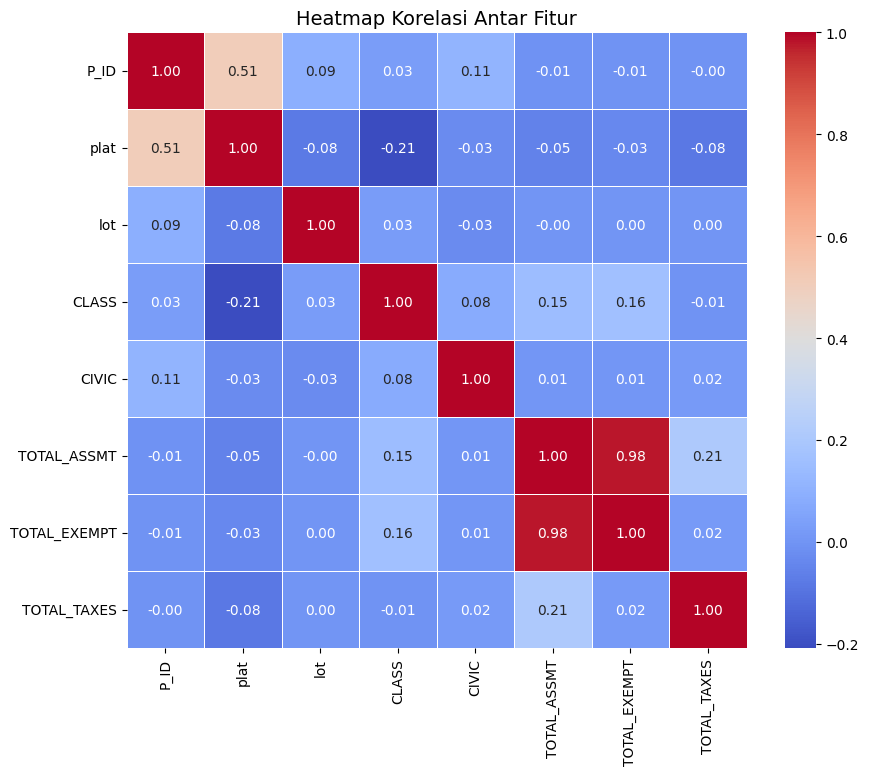

In [12]:
# Memilih hanya kolom numerik untuk analisis korelasi
numerical_cols = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Menambahkan judul
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)

# Menampilkan plot
plt.show()

**Melihat Outlier**

In [13]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Menampilkan jumlah outlier di setiap kolom numerik
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    num_outliers = detect_outliers_iqr(df, col).shape[0]
    print(f"Jumlah outliers di kolom '{col}': {num_outliers}")

Jumlah outliers di kolom 'P_ID': 0
Jumlah outliers di kolom 'plat': 0
Jumlah outliers di kolom 'lot': 395
Jumlah outliers di kolom 'CLASS': 2589
Jumlah outliers di kolom 'CIVIC': 4581
Jumlah outliers di kolom 'TOTAL_ASSMT': 4124
Jumlah outliers di kolom 'TOTAL_EXEMPT': 7639
Jumlah outliers di kolom 'TOTAL_TAXES': 3597


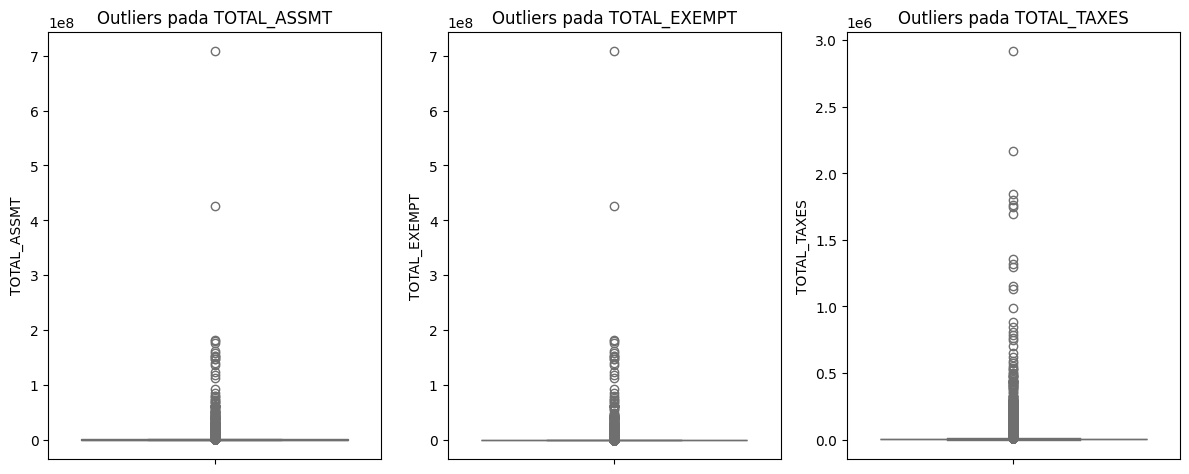

In [14]:
# Pilih hanya kolom yang diminta
selected_cols = ["TOTAL_ASSMT", "TOTAL_EXEMPT", "TOTAL_TAXES"]

plt.figure(figsize=(12, 5))  # Atur ukuran gambar

# Loop untuk membuat boxplot setiap kolom
for i, col in enumerate(selected_cols, 1):
    plt.subplot(1, 3, i)  # 1 baris, 3 kolom
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Outliers pada {col}")

plt.tight_layout()  # Agar tidak tumpang tindih
plt.show()

# Data Preparation

**Mengatasi Missing Values**

In [15]:
# 1. Drop baris jika kolom penting numerik (TOTAL_ASSMT, TOTAL_TAXES, dll.) kosong
df.dropna(subset=['P_ID', 'TAX_MAP', 'plat', 'lot', 'CLASS','TOTAL_ASSMT', 'TOTAL_EXEMPT', 'TOTAL_TAXES'], inplace=True)

# 2. Isi kolom kategorikal dengan 'Unknown'
categorical_cols = ['SUFFIX', 'S_SUFFIX', 'COMPANY', 'STATE','FIRST_NAME', 'LAST_NAME','CITY', 'CITY 1','STREET', 'STREET 1', 'FORMATED_ADDRESS', 'FREE_LINE_2']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# 3. Isi dengan 0 untuk kolom berikut
fill_cols = ['CIVIC 1', 'CIVIC', 'ZIP_POSTAL', 'ZIP_POSTAL 1']
for col in fill_cols:
    df[col].fillna(0, inplace=True)

# 4. Menghapus kolom UNIT karena 90% missing values
df.drop(columns=['UNIT'], inplace=True)

# 5. Cek hasil setelah imputasi
print(df.isnull().sum())

P_ID                 0
TAX_MAP              0
plat                 0
lot                  0
unit                 0
CLASS                0
SHORT_DESC           0
LEVY_CODE_1          0
SHORT_DESC 1         0
CIVIC                0
STREET               0
SUFFIX               0
FORMATED_ADDRESS     0
CITY                 0
ZIP_POSTAL           0
FIRST_NAME           0
LAST_NAME            0
COMPANY              0
FREE_LINE_2          0
CIVIC 1              0
STREET 1             0
S_SUFFIX             0
CITY 1               0
STATE                0
ZIP_POSTAL 1         0
TOTAL_ASSMT          0
TOTAL_EXEMPT         0
TOTAL_TAXES          0
Property_Location    0
dtype: int64


In [16]:
# Menampilkan jumlah baris dan kolom setelah mengatasi missing values
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 44033
Jumlah kolom: 29


**Mengatasi Outlier**

In [17]:
# Daftar kolom yang akan diperiksa
cols = ['TOTAL_ASSMT', 'TOTAL_EXEMPT', 'TOTAL_TAXES']

# Menghapus outlier dengan IQR
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter hanya data dalam rentang normal
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Data setelah menghapus outlier: {df.shape}")

Data setelah menghapus outlier: (31605, 29)


**Standarisasi Data Kategorikal**

In [18]:
# Mengubah teks menjadi huruf kecil agar konsisten
df["SHORT_DESC"] = df["SHORT_DESC"].str.lower()

# Menampilkan 5 baris pertama setelah konversi
print(df[["SHORT_DESC"]].head())

       SHORT_DESC
2   single family
4   single family
5     2 -5 family
10    2 -5 family
11    2 -5 family


**Memisahkan Latitude dan Longitude**

In [19]:
# Membersihkan nama kolom dari spasi ekstra
df.columns = df.columns.str.strip()

# Menampilkan beberapa contoh data untuk memastikan formatnya benar
print("Contoh data Property_Location:")
print(df["Property_Location"].head())

# Mengekstrak Longitude dan Latitude dari format "POINT (longitude latitude)"
df[["Longitude", "Latitude"]] = df["Property_Location"].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')

# Menampilkan hasil
print("\nData setelah ekstraksi Longitude dan Latitude:")
print(df[["Longitude", "Latitude"]].head())

Contoh data Property_Location:
2     POINT (-71.415484981 41.858035988)
4     POINT (-71.400355981 41.821832998)
5     POINT (-71.394502982 41.820420018)
10    POINT (-71.424641037 41.810907019)
11    POINT (-71.430050969 41.807336999)
Name: Property_Location, dtype: object

Data setelah ekstraksi Longitude dan Latitude:
        Longitude      Latitude
2   -71.415484981  41.858035988
4   -71.400355981  41.821832998
5   -71.394502982  41.820420018
10  -71.424641037  41.810907019
11  -71.430050969  41.807336999


In [20]:
df.head()

,P_ID,TAX_MAP,plat,lot,unit,CLASS,SHORT_DESC,LEVY_CODE_1,SHORT_DESC 1,CIVIC,...,S_SUFFIX,CITY 1,STATE,ZIP_POSTAL 1,TOTAL_ASSMT,TOTAL_EXEMPT,TOTAL_TAXES,Property_Location,Longitude,Latitude
2,69878.0,077-0893-0000,77.0,893.0,0000,1.0,single family,OO01,OO01,36.0,...,St,Providence,RI,02904,322600.0,0.0,3374.24,POINT (-71.415484981 41.858035988),-71.415484981,41.858035988
4,5030.0,016-0560-0000,16.0,560.0,0000,1.0,single family,OO01,OO01,22.0,...,St,Providence,RI,02906,643000.0,0.0,6725.48,POINT (-71.400355981 41.821832998),-71.400355981,41.821832998
5,5647.0,017-0559-0000,17.0,559.0,0000,2.0,2 -5 family,OO01,OO01,42.0,...,St,Providence,RI,02906,688800.0,0.0,7204.52,POINT (-71.394502982 41.820420018),-71.394502982,41.820420018
10,9522.0,030-0316-0000,30.0,316.0,0000,2.0,2 -5 family,NO01,NO01,21.0,...,St,Weymouth,MA,02190,521600.0,0.0,9571.36,POINT (-71.424641037 41.810907019),-71.424641037,41.810907019
11,9863.0,031-0148-0000,31.0,148.0,0000,2.0,2 -5 family,NO01,NO01,33.0,...,Unknown,Providence,RI,02907,267200.0,0.0,4903.12,POINT (-71.430050969 41.807336999),-71.430050969,41.807336999


In [21]:
# Simpan data ke file CSV
df.to_csv("Property_Tax_Roll_bersih2.csv", index=False)

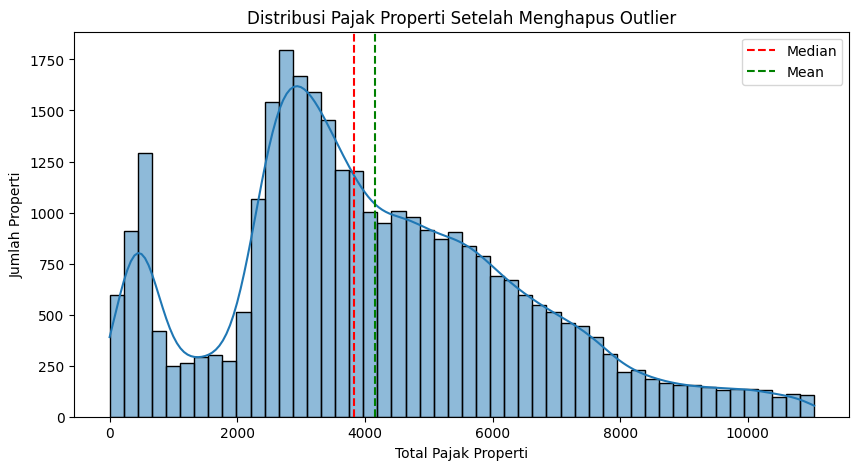

In [22]:
# Cek distribusi pajak properti
plt.figure(figsize=(10,5))
sns.histplot(df["TOTAL_TAXES"], bins=50, kde=True)
plt.axvline(df["TOTAL_TAXES"].median(), color='r', linestyle='dashed', label="Median")
plt.axvline(df["TOTAL_TAXES"].mean(), color='g', linestyle='dashed', label="Mean")
plt.xlabel("Total Pajak Properti")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Pajak Properti Setelah Menghapus Outlier")
plt.legend()
plt.show()

# Data Visualization

### Visualisasi Rata-rata Properti Berdasarkan Kota

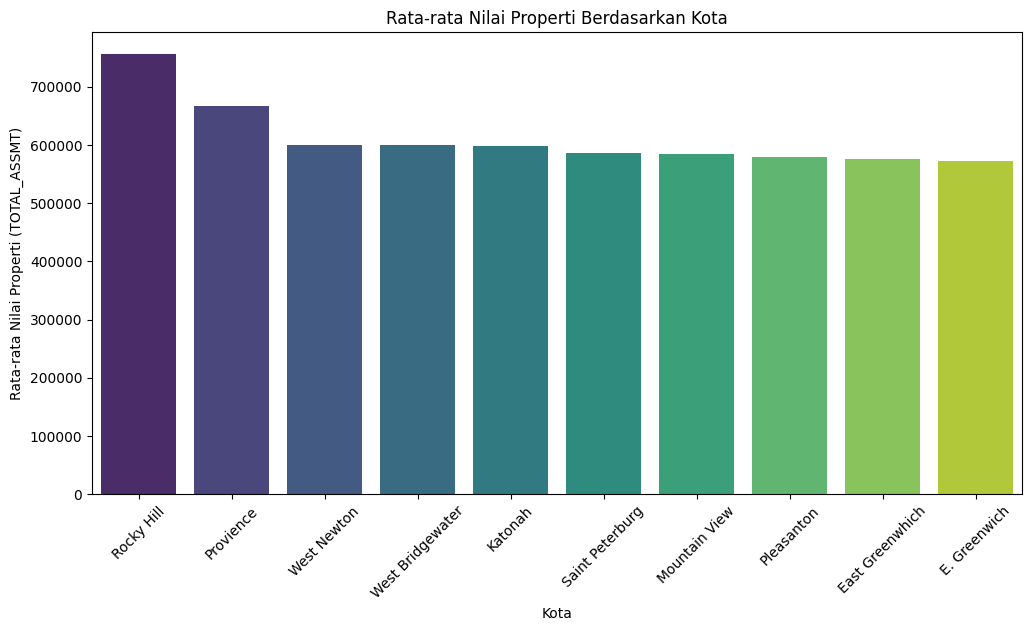

In [23]:
# Pastikan TOTAL_ASSMT bertipe numerik
df['TOTAL_ASSMT'] = pd.to_numeric(df['TOTAL_ASSMT'], errors='coerce')

# Mengelompokkan data berdasarkan CITY 1 dan menghitung rata-rata TOTAL_ASSMT
grouped = df.groupby('CITY 1')['TOTAL_ASSMT'].mean().reset_index()

# Mengambil 10 kota dengan rata-rata TOTAL_ASSMT tertinggi
top_cities = grouped.sort_values(by='TOTAL_ASSMT', ascending=False).head(10)

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='CITY 1', y='TOTAL_ASSMT', palette='viridis')

plt.xlabel("Kota")
plt.ylabel("Rata-rata Nilai Properti (TOTAL_ASSMT)")
plt.title("Rata-rata Nilai Properti Berdasarkan Kota")
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

### Rata-rata Nilai Properti Berdasarkan Jenis Penggunaan Properti

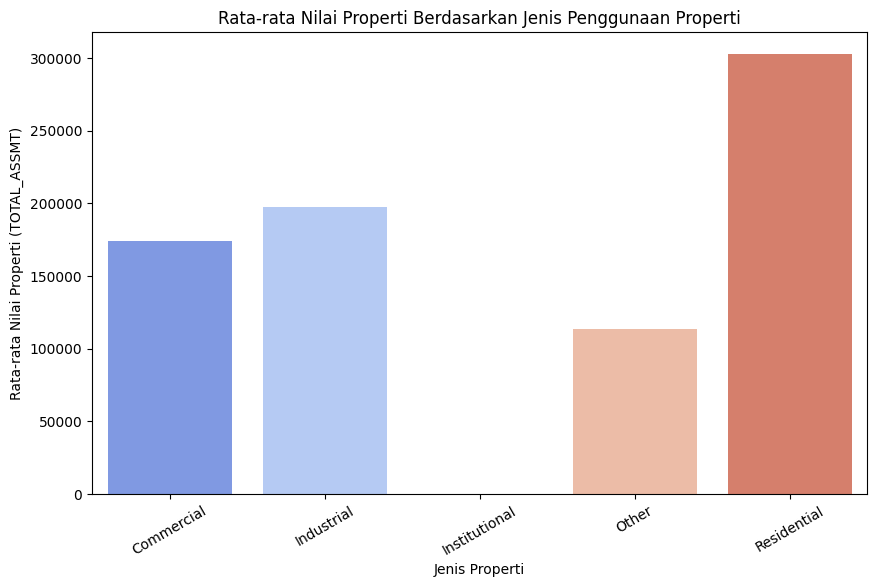

In [24]:
# Fungsi untuk mengkategorikan jenis properti
def categorize_property(desc):
    if pd.isna(desc):
        return "Other"
    desc = desc.lower()
    if "single family" in desc or "residential" in desc or "apartment" in desc or "2 -5 family" in desc:
        return "Residential"
    elif "commercial" in desc:
        return "Commercial"
    elif "industrial" in desc:
        return "Industrial"
    elif "hospital" in desc or "municipal" in desc or "school" in desc or "church" in desc or "state" in desc:
        return "Institutional"
    else:
        return "Other"

# Menambahkan kolom kategori properti
df["Property_Type"] = df["SHORT_DESC"].apply(categorize_property)

# Menghitung rata-rata nilai properti berdasarkan kategori
property_avg = df.groupby("Property_Type")["TOTAL_ASSMT"].mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=property_avg, x="Property_Type", y="TOTAL_ASSMT", palette="coolwarm")

plt.xlabel("Jenis Properti")
plt.ylabel("Rata-rata Nilai Properti (TOTAL_ASSMT)")
plt.title("Rata-rata Nilai Properti Berdasarkan Jenis Penggunaan Properti")
plt.xticks(rotation=30)

# Menampilkan plot
plt.show()


### Top 10 Properti dengan Pajak Tertinggi

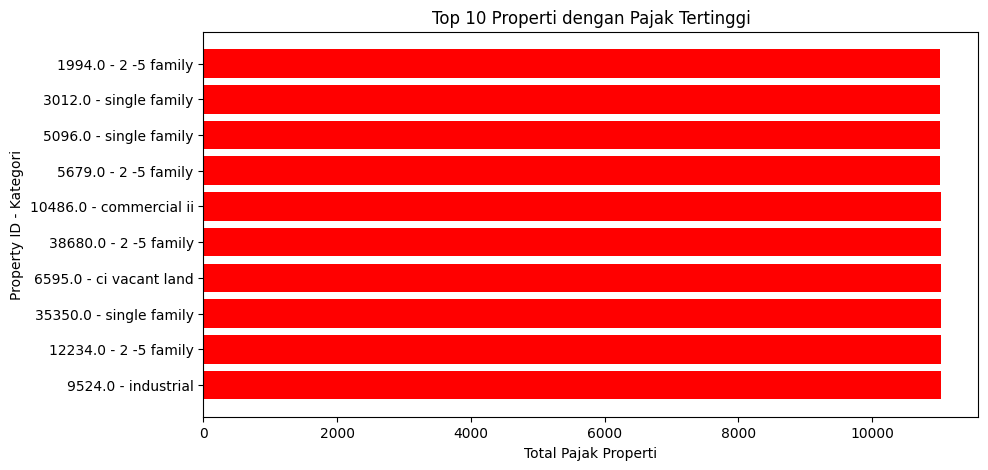

In [25]:
# Urutkan berdasarkan total pajak properti
df_sorted = df.sort_values(by="TOTAL_TAXES", ascending=True)
# Ambil 10 properti dengan pajak tertinggi
top_10_tax = df_sorted.tail(10).copy()  # Gunakan .copy() untuk menghindari SettingWithCopyWarning

# Isi NaN dengan string kosong lalu buat label baru
top_10_tax["SHORT_DESC"] = top_10_tax["SHORT_DESC"].fillna("")
top_10_tax["Label"] = top_10_tax["P_ID"].astype(str) + " - " + top_10_tax["SHORT_DESC"]

plt.figure(figsize=(10, 5))
plt.barh(top_10_tax["Label"], top_10_tax["TOTAL_TAXES"], color='red')
plt.xlabel("Total Pajak Properti")
plt.ylabel("Property ID - Kategori")
plt.title("Top 10 Properti dengan Pajak Tertinggi")
plt.gca().invert_yaxis()  # Membalikkan sumbu agar yang terbesar di atas
plt.show()